## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns           #for visualization 
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load the  data 
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
total=len(df.index)
total

294478

c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

*d*. The proportion of users converted.

In [6]:
proportion = (float(df.query('converted == 1')['user_id'].nunique())/total)
print("The proportion of users converted is {0:.5%}".format(proportion))

The proportion of users converted is 11.94419%


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

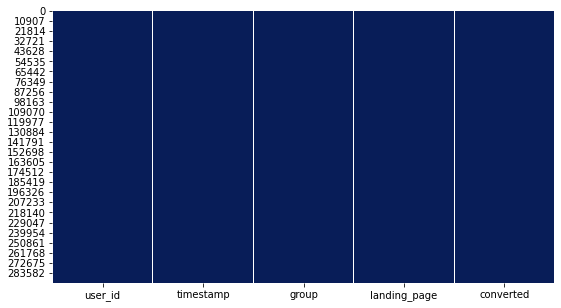

In [8]:
#The heatmap under shows how much data are missing! , there's no missing data 
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page") | (group == "control" & landing_page != "old_page") | (group != "control" & landing_page == "old_page")').index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
result=df2.duplicated(['user_id'], keep=False)
df2[result]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
information=df2[df2['user_id'] == 773192]
information

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.shape

(290585, 5)

In [15]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
print(df2[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


In [16]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
convert = df2.query('converted == 1')['user_id'].nunique()
result = convert/df2.shape[0]
print(" probability of an individual converting regardless of the page they receive? is" ,result*100)


 probability of an individual converting regardless of the page they receive? is 11.959708724499627


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
convert = df2.query('converted == 1 & group == "control"')['user_id'].nunique()
control_indiv =df2.query('group == "control"')['user_id'].nunique()
result = convert /control_indiv
print("  the probability they converted is",result*100)


  the probability they converted is 12.03863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
convert = df2.query('converted == 1 & group == "treatment"')['user_id'].nunique()
treat_insivi =float(df2.query('group == "treatment"')['user_id'].nunique())
result = convert /treat_insivi
print("the probability they converted is ",result*100)


the probability they converted is  11.880806551510565


d. What is the probability that an individual received the new page?

In [20]:
new_page = df2.query('landing_page == "new_page"')['user_id'].nunique()
result = new_page/df2.shape[0]
print("The probability that an individual received the new page is",result*100)


The probability that an individual received the new page is 50.00619442226688


. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

the converted probability  of an individual converting regardless of the page they receive is (11.96%,)
 also the converted probability of individual was in the control group is 12.04%
also the converted probability of an individual was in the treatment group of  converted is 11.88%.
 The probablity result of users converted in  (control group,  treatment group and individual converting regardless of the page they receive ) 
 are very similar to each other in addtions there is no  sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null hypothese ( H0: Pnew - Pold <= 0 ) 

Alternative hypothese ( H1: Pnew - Pold > 0 )

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>



```
# This is formatted as code
```

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
Pnew=round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
Pnew

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
Pold = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
Pold

0.1196

c. What is $n_{new}$?

In [23]:
Nnew = df2.query('landing_page == "new_page"')['user_id'].nunique()
Nnew

145310

d. What is $n_{old}$?

In [24]:
Nold = df2.query('landing_page == "old_page"')['user_id'].nunique() 
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
converted_Npage = np.random.choice([0,1],Nnew, p=(Pnew,1-Pnew))
converted_Npage

array([0, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
converted_Opage = np.random.choice([0,1],Nold, p=(Pold,1-Pold))
converted_Opage

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#got the main of old and new page then 𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑= 
New=converted_Npage.mean()
Old=converted_Opage.mean()
result =New-Old
result

-0.00019074831062515507

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = [] # Array
size = df.shape[0]
for _ in range(10000): #Simulate 10,000
    sample = df2.sample(size, replace = True)
    converted_Npage = np.random.choice([0,1],Nnew, p=(Pnew,1-Pnew))
    converted_Opage = np.random.choice([0,1],Nold, p=(Pold,1-Pold))
    p_diffs.append(converted_Npage.mean() - converted_Opage.mean())
    

p_diffs = np.array(p_diffs) 

In [29]:
p_diffs = np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  19.,  153.,  661., 1893., 2793., 2562., 1396.,  455.,   63.,
           5.]),
 array([-0.0043615 , -0.00345435, -0.00254719, -0.00164004, -0.00073288,
         0.00017427,  0.00108143,  0.00198859,  0.00289574,  0.0038029 ,
         0.00471005]),
 <a list of 10 Patch objects>)

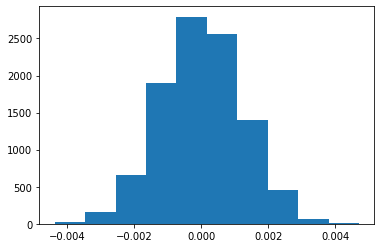

In [30]:
plt.hist(p_diffs)

In [31]:
# Create number of users 
ConvertNew = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
ConvertOld = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()


actual_ConvertNew = float(ConvertNew)/ float(Nnew) 
actual_ConvertOld = float(ConvertOld)/ float(Nold) #actual converted rate
observition_diff = actual_ConvertNew - actual_ConvertOld

print(observition_diff)

-0.0015782389853555567


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9082


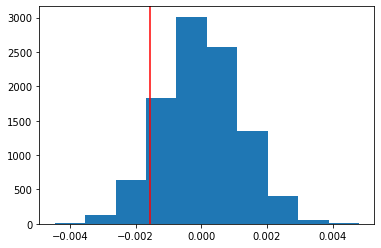

In [32]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)#the Null distribution
plt.axvline(x=observition_diff,color ='red') #vertical line 

#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
print((null_vals > observition_diff).mean())

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** Put your answer here.**

We failure to reject the null with a Type I error rate of 5% and a Pold > Alpha. As a result, the data indicate that the old page had a greater conversion rate than the new page, with a type I error rate of 0.05.

The p-value is the probability of obtaining a statistic as extreme or more extreme than the one observed in the experiment. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = ConvertOld
convert_new = ConvertNew
n_old = Nold
n_new = Nnew
convert_old,convert_new,n_old,n_new


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old])
,np.array([n_new,n_old]), alternative = 'larger')

z_score, p_value


(-1.3109241984234394, 0.9050583127590245)

In [35]:
from scipy.stats import norm
print(norm.cdf(z_score))#This value means that a significant our z-score is.
print(norm.ppf(1-(0.05/2)))# This value indicates our critical value at 95% confidence is

0.09494168724097551
1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

We failure to reject the null hypothesis that old page users have a greater or equal conversion rate than old page users because the z-score of 1.3109241984234394 does not surpass the critical threshold of 1.959963984540054. As a result, there is no difference in the converted rate between the new and old pages. This is the same as the results from sections J and K.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Because the response variable is a categorical variable, Logistic Regression will be used  the categorical variable are (conversion , no conversion,). Multiple regression with a categorical outcome variable and continuous predictor factors is known as logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1 # add new colun intercept
df2= df2.join(pd.get_dummies(df2['landing_page'])) #create a dummy variable column for which page each user received
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
Logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = Logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:41:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

The corresponding p-value for ab page is 0.190. There seems to be no difference between the treatment and control groups, as indicated by the null in the c-e section. Another hypothesis is that there is a difference between the treatment and control groups.

Part II implies the old page is better unless the new page shows to be significantly better at a Type I error rate of 5%. When compared to questions c-e, they contain diffrent  explainory variables or factors for the result.

*f*. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Another thing to consider is the average usage during the day. We can see if the conversion rate is affected by the average time of day when the user browses the page. We may also use avrage as a categorical variable, such as "less than 10 minutes, 30 minutes, 1 hour," or "greater than 1 hour."

The disadvantage of including extra variables in a regression model is that it makes the model more difficult to comprehend.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [40]:
countries_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [42]:
df_new = df_new.drop('CA', axis=1)

In [43]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [44]:
df_new['intercept'] = 1 #intercept variable
logit22 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']]) #Logit regression
result = logit22.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               2.323e-05
Time:                        01:41:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.

In [45]:
1/np.exp(-0.0149),np.exp(-0.0408),np.exp(0.0099)


(1.0150115583846535, 0.9600211149716509, 1.0099491671175422)

Convert will be 1.5 percent more likely to occur for every unit reduction in new page, assuming all other variables remain unchanged. 

When the unit for the UK increases , the likelihood of a conversion increases by 9.6%, assuming all other variables remain unchanged. 

When the US unit increases, the likelihood of a conversion increases by 9.10 percent, assuming all other variables remain unchanged.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
#interaction between page and country to see if there significant effects on conversion 
#we Create new columns to indicate which user/country converted
df_new['UK_new'] = df_new['new_page']* df_new['UK']# intereacton variable
df_new['US_new'] = df_new['new_page']* df_new['US'] 

In [67]:
logit44 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK_new','US_new','UK','US']])
res = logit44.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        02:23:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page      -0.0206      0.

In [69]:
1/np.exp(res.params)

intercept    7.289813
new_page     1.020776
UK_new       1.048001
US_new       0.969090
UK           1.017682
US           1.005761
dtype: float64

In [62]:
np.exp(	-0.0057)

0.9943162141784332

The coefficients of the interaction variables "UK new page" and "US new page" are different from the coefficient of new page itself, as seen in the previous Logit Regression Results.

Furthermore, only the intercept's p-value is less than 0.05, indicating that the conversion rate is statistically significant. The summary's other variables aren't statistically significant. Furthermore, the Z-scores for all X factors are too small to be useful in predicting conversion rate.

As a result, the country in which a user resides has no impact on the conversion rate when considering the page in which the user resides.


For every unit for new_page decreases, convert will be 2.0% more likely 
to happen, holding all other varible constant.

Holding all other variables constant, conversion is 1.04 times more probable for UK and new page users than for CA and new page users. 

Holding all other variables constant, conversion is 0.96 times more probable for US and new page users than for CA and new page users.

Holding all other variables constant, users in the UK are 1.75 percent more likely to convert than users in CA. 

Holding all other variables constant, users in the US are 5.76 percent more likely to convert than those in CA

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
 x = df_new[['new_page','UK_new','US_new','UK','US']]
y = df_new['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [72]:
lm = LinearRegression()

In [73]:
lm.fit(X_train,y_train) # fit the train data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print(lm.score(X_test,y_test))

1.725169559441131e-05


The reuslt score is quite low, indicating that the page and country dataset do not suit the predit conversion rate well.

only the intercept's p-value is less than 0.05, indicating that the conversion rate is statistically significant. The summary's other variables aren't statistically significant, the Z-scores for all X factors are too small to be useful in predicting conversion rate.and the country in which a user resides has no impact on the conversion rate when considering the page in which the user resides.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

https://www.stats4stem.org/introduction-to-hypothesis-testing

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

In [75]:
pip install nbconvert


In [55]:
%%shell
jupyter nbconvert --to html /content/Analyze_ab_test_results_notebook-2.ipynb

[NbConvertApp] WARNING | pattern u'/content/Analyze_ab_test_results_notebook-2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 

CalledProcessError: ignored